<a href="https://colab.research.google.com/github/vanilite/RockPaperScissorML/blob/main/RockPaperScissors_MLDicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rock, Paper, Scissor - Dicoding**
**Try Setiawan Iksan - Manado**

Mount ke google drive terlebih dahulu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import itertools
import os
import zipfile
import random
import shutil
import PIL
import PIL.Image
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Dense
from PIL import Image
from shutil import copyfile
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras import regularizers

pada sel ini harus di run 3 kali, dikarenakan pada input_directory tidak bisa membaca 3 kelas sekaligus

In [ ]:
def resize_and_delete_images(directory, size):
    image_list = os.listdir(directory)
    for image_name in image_list:
        image_path = os.path.join(directory, image_name)
        with Image.open(image_path) as image:
            resized_image = image.resize(size, Image.ANTIALIAS)
            output_path = os.path.join(directory, f"resized_{image_name}")
            resized_image.save(output_path)
            os.remove(image_path)

            print(f"Resized: {image_path} -> {output_path}")
            print(f"Deleted: {image_path}")

# ganti directory sesuai dengan kelas nya (.../rock/,.../paper/,.../scissors/)
input_directory = '/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/'

size = (150, 150)

# disini dataset yang telah di resize tidak akan tertimpa karena setelah di resize yang lama akan terhapus
resize_and_delete_images(input_directory, size)

<ipython-input-5-652d88d74b91>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


Resized: /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_GktptVfvaYXOIJCz.png -> /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_resized_GktptVfvaYXOIJCz.png
Deleted: /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_GktptVfvaYXOIJCz.png
Resized: /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_6ZAZiGMRp4VD1hDD.png -> /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_resized_6ZAZiGMRp4VD1hDD.png
Deleted: /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_6ZAZiGMRp4VD1hDD.png
Resized: /content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/scissors/resized_resized_resized_resized_Bd18RfxcJr6O5n6j.png -> /conte

In [ ]:
pip install split-folders

In [ ]:
#Splitting Image Data
import splitfolders
splitfolders.ratio('/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/rockpaperscissors/',
                   output='/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/splitted_data/',
                   seed=1337,
                   ratio=(0.6,0.4))

Copying files: 2188 files [00:28, 77.37 files/s] 


pada sel ini harus di run 3 kali, dikarenakan pada image_directory dan save_to_dir tidak bisa membaca dan menyimpan 3 kelas sekaligus

In [ ]:
#Data Augmentation
datagen = ImageDataGenerator(
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True
        )

# ganti directory sesuai dengan kelas nya (.../rock/,.../paper/,.../scissors/)
image_directory = r'/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/splitted_data/train/paper/'
SIZE = 150
dataset = []
my_images = os.listdir(image_directory)

for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'png'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
iterasi = 0

# ganti directory sesuai dengan kelas nya (.../rock,.../paper,.../scissors)
for batch in datagen.flow(x, batch_size=32,
                          save_to_dir= '/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/augmented/paper',
                          save_prefix='aug_',
                          save_format='png'):
    iterasi += 1
    if iterasi >=32:
        break

In [ ]:
import pathlib
train_dir = '/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/splitted_data/train/'
train_dir = pathlib.Path(train_dir)
val_dir = '/content/gdrive/MyDrive/Colab_Notebooks/ml_dicoding/splitted_data/val/'
val_dir = pathlib.Path(val_dir)

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
#initialize train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

#initialize validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

Found 1312 files belonging to 3 classes.
Found 876 files belonging to 3 classes.


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.011764707 0.9333334


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Regularizer

In [ ]:
model = Sequential([
    Dense(64, input_dim=100, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    # The first CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The second CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The third CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The fourth CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)      

In [ ]:
model.compile(
  optimizer='Adamax',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    train_ds,
    epochs=15,
    verbose=1,
    callbacks=[callbacks],
    validation_data=val_ds,
)

Epoch 1/15
 6/41 [===>..........................] - ETA: 2s - loss: 1.1493 - accuracy: 0.3333

41/41 [==============================] - 5s 81ms/step - loss: 0.7515 - accuracy: 0.6745 - val_loss: 0.3927 - val_accuracy: 0.8607
Epoch 2/15
41/41 [==============================] - 3s 81ms/step - loss: 0.2341 - accuracy: 0.9123 - val_loss: 0.1720 - val_accuracy: 0.9452
Epoch 3/15
41/41 [==============================] - 3s 77ms/step - loss: 0.1110 - accuracy: 0.9642 - val_loss: 0.1546 - val_accuracy: 0.9429
Epoch 4/15
41/41 [==============================] - 3s 77ms/step - loss: 0.0755 - accuracy: 0.9756 - val_loss: 0.1581 - val_accuracy: 0.9509
Epoch 5/15
41/41 [==============================] - 3s 80ms/step - loss: 0.0552 - accuracy: 0.9809 - val_loss: 0.1339 - val_accuracy: 0.9578
Epoch 6/15
41/41 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9909
Reached 99% accuracy. Stop Training
41/41 [==============================] - 3s 77ms/step - loss: 0.0409 - accuracy: 0.9909 - val_loss: 0.1614 - val_accuracy: 0.9578


Saving scissors.png to scissors.png
1/1 [==============================] - 0s 27ms/step
scissors.png
scissors


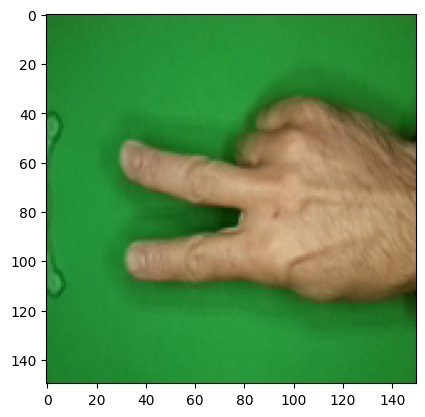

In [ ]:
from google.colab import files
%matplotlib inline

uploaded = files.upload()

# Load the classes that the model can predict
classes = ['paper', 'rock', 'scissors']

for fn in uploaded.keys():

 # predicting images
 path = fn
 img = image.load_img(path, target_size=(150,150))

 imgplot = plt.imshow(img)
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)
 images = np.vstack([x])

 predictions = model.predict(images)
 print(fn)

 # Find the index of the highest confidence class
 highest_confidence_class_index = np.argmax(predictions)

 # Print the class with the highest confidence
 print(classes[highest_confidence_class_index])